<a href="https://colab.research.google.com/github/Harsh003-va/EnigmasoftProject/blob/main/Arrythmia_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PREDICTION AND CLASSIFICATION OF CARDIAC ARRYTHMIA USING DEEP LEARNING**



In [ ]:
!pip install tensorflow==2.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 83.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 103.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 105.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 64.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attemp

In [ ]:
!pip install keras
!pip install wfdb
!pip install numpy
!pip install pandas




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 7.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow
import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Conv2D, MaxPool2D
#from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import datetime
import os

In [ ]:
tensorboard = TensorBoard(log_dir = os.path.join(
    "logs",
    "fit",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'

train_datagen = ImageDataGenerator(rescale=1.0/255.0, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_batches = train_datagen.flow_from_directory(train_path, target_size=(128, 128), classes=['F','N','Q','S','V'], batch_size=32, class_mode='categorical')

test_batches = test_datagen.flow_from_directory(test_path, target_size=(128, 128), classes=['F','N','Q','S','V'], batch_size=32, shuffle=False)

Found 203 images belonging to 5 classes.
Found 29 images belonging to 5 classes.


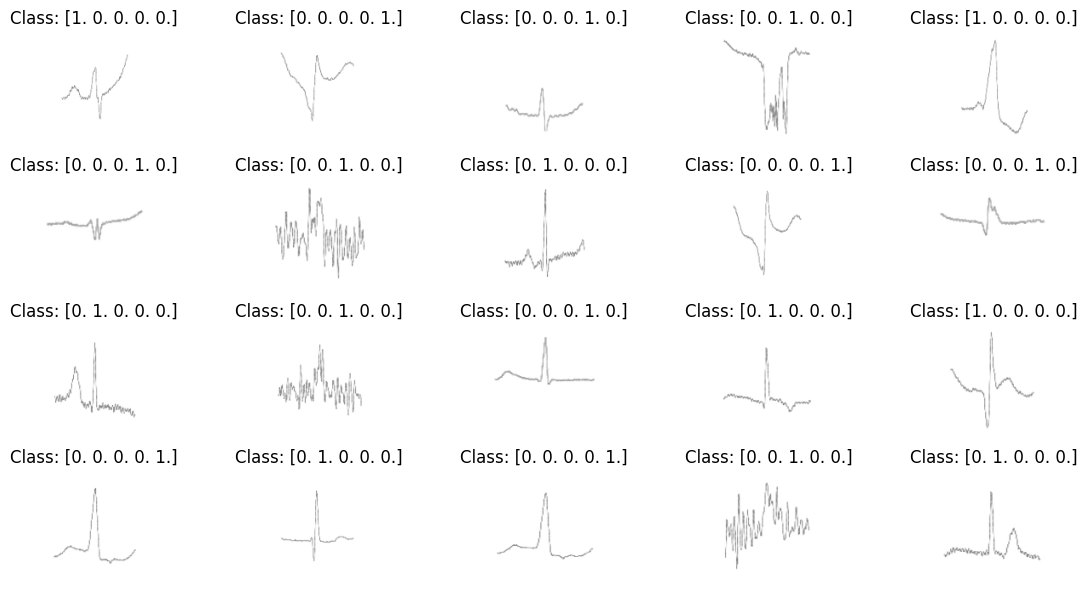

In [ ]:
import matplotlib.pyplot as plt

# Retrieve a batch of preprocessed images from the training data generator
images, labels = next(train_batches)

# Display the preprocessed images
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 6))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i])
    ax.axis('off')
    ax.set_title('Class: {}'.format(labels[i]))

plt.tight_layout()
plt.show()


In [ ]:
IMAGE_SIZE = (128,128,3)
model = Sequential()

model.add(Conv2D(64, (3,3),strides = (1,1), input_shape = IMAGE_SIZE,kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(64, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(128, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Conv2D(256, (3,3),strides = (1,1),kernel_initializer='glorot_uniform'))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2, 2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(2048))

model.add(tensorflow.keras.layers.ELU())

model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


In [ ]:
len(model.layers)

27

In [ ]:
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])
train_steps_per_epoch = np.math.ceil(train_batches.samples / train_batches.batch_size)
print(train_steps_per_epoch)
from IPython.display import display
from PIL import Image
history = model.fit(train_batches, steps_per_epoch=7, callbacks = [tensorboard], epochs=30)

7
Epoch 1/50
7/7 [==============================] - 117s 14s/step - loss: 3.3769 - accuracy: 0.5517
Epoch 2/50
7/7 [==============================] - 90s 12s/step - loss: 1.5640 - accuracy: 0.7192
Epoch 3/50
7/7 [==============================] - 87s 12s/step - loss: 0.6775 - accuracy: 0.8079
Epoch 4/50
7/7 [==============================] - 85s 13s/step - loss: 0.5680 - accuracy: 0.8177
Epoch 5/50
7/7 [==============================] - 90s 12s/step - loss: 0.4203 - accuracy: 0.8670
Epoch 6/50
7/7 [==============================] - 91s 13s/step - loss: 0.4095 - accuracy: 0.8473
Epoch 7/50
7/7 [==============================] - 93s 13s/step - loss: 0.3401 - accuracy: 0.8621
Epoch 8/50
7/7 [==============================] - 89s 14s/step - loss: 0.3504 - accuracy: 0.8768
Epoch 9/50
7/7 [==============================] - 88s 13s/step - loss: 0.2486 - accuracy: 0.8916
Epoch 10/50
7/7 [==============================] - 92s 14s/step - loss: 0.4017 - accuracy: 0.8867
Epoch 11/50
7/7 [=========

In [ ]:
model.compile(Adam(lr=.00015), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 64)      1792      
                                                                 
 elu_7 (ELU)                 (None, 126, 126, 64)      0         
                                                                 
 batch_normalization_7 (Batc  (None, 126, 126, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 elu_8 (ELU)                 (None, 124, 124, 64)      0         
                                                                 
 batch_normalization_8 (Batc  (None, 124, 124, 64)     256       
 hNormalization)                                      

In [ ]:
train_steps_per_epoch = np.math.ceil(train_batches.samples / train_batches.batch_size)
print(train_steps_per_epoch)

7


In [ ]:
from IPython.display import display
from PIL import Image
history = model.fit(train_batches, steps_per_epoch=7, callbacks = [tensorboard], epochs=50)

Epoch 1/50
7/7 [==============================] - 111s 15s/step - loss: 5.0721 - accuracy: 0.5222
Epoch 2/50
7/7 [==============================] - 94s 13s/step - loss: 1.4930 - accuracy: 0.6995
Epoch 3/50
7/7 [==============================] - 97s 14s/step - loss: 0.9574 - accuracy: 0.7882
Epoch 4/50
7/7 [==============================] - 92s 13s/step - loss: 0.7017 - accuracy: 0.8227
Epoch 5/50
7/7 [==============================] - 96s 13s/step - loss: 0.4761 - accuracy: 0.8621
Epoch 6/50
7/7 [==============================] - 92s 13s/step - loss: 0.3890 - accuracy: 0.8424
Epoch 7/50
7/7 [==============================] - 95s 13s/step - loss: 0.2842 - accuracy: 0.8916
Epoch 8/50
7/7 [==============================] - 92s 13s/step - loss: 0.3307 - accuracy: 0.9163
Epoch 9/50
7/7 [==============================] - 91s 13s/step - loss: 0.2518 - accuracy: 0.8966
Epoch 10/50
7/7 [==============================] - 91s 13s/step - loss: 0.2661 - accuracy: 0.8966
Epoch 11/50
7/7 [===========

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

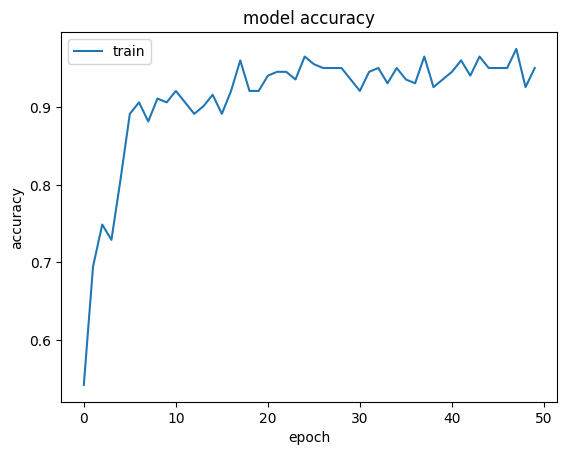

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

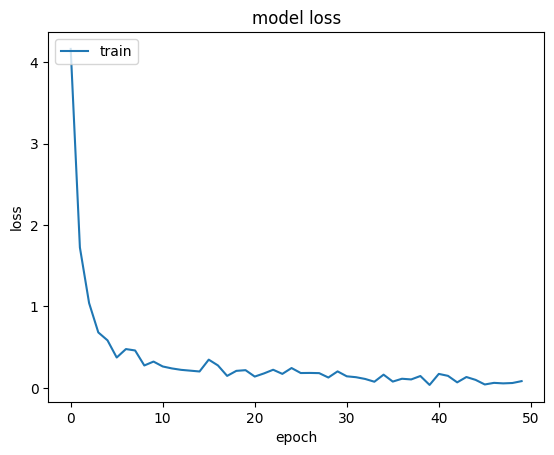

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [ ]:
model.save('detection.h5')

In [ ]:
from tensorflow.keras.models import load_model

path_to_model = '/content/Arrythmia detection.h5'

model = load_model(path_to_model)

In [ ]:
test_steps_per_epoch = np.math.ceil(test_batches.samples / test_batches.batch_size)
test_accu = model.evaluate(test_batches, steps=2)

print('The testing accuracy is:',test_accu[1]*100, '%')

1/2 [==============>...............] - ETA: 1s - loss: 12.7629 - accuracy: 0.2414

2/2 [==============================] - 1s 46ms/step - loss: 12.7629 - accuracy: 0.2414
The testing accuracy is: 24.13793057203293 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_batches.samples / test_batches.batch_size)
print(test_steps_per_epoch)

predictions = model.predict(test_batches, steps=2)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)
print(predicted_classes)
print(len(predicted_classes))

1
1/2 [==============>...............] - ETA: 0s

2/2 [==============================] - 0s 62ms/step
[2 2 2 2 2 2 3 2 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
29


In [ ]:
filename = "/content/drive/MyDrive/Dataset/test/F/Ffig_6.png"

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
image = load_img(filename, target_size=(128, 128))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image /= 255.0
pred = model.predict(image.reshape((1, 128, 128, 3)))
print(pred)
pred_class = pred.argmax(axis=1)
if(pred_class == 1):
  print('Patient have S type Arrythmia')
elif(pred_class == 2):
  print('Patient have N type Arrythmia')
elif(pred_class == 3):
  print('Patient have F type Arrythmia')
elif(pred_class== 4):
  print('Patient have Q type Arrythmia')
else:
  print('Patient have V type Arrythmia')

1/1 [==============================] - 0s 25ms/step
[[3.6025280e-10 1.2508655e-06 7.2813940e-01 2.7185941e-01 2.0601744e-17]]
Patient have N type Arrythmia
